### Carga de datos


De los datos que obtuvimos en la seccion previa tenemos el resumen;

| Nombre de la variable| Descripción | Tipo|
|------------------------------------------------|-----------------------------------------------------------------------------------------------------|-----------|
| moroso |  Persona que no ha pagado en mas de 90 dias| Moroso/ No moroso  |
| Porcentaje crediticio | Proporcion de la linea de credito usada| Porcentaje|
|edad| Edad del cliente en años | entero |
|Retrasos bimestrales | Cantidad de veces que no se ha pagado en dos meses en una plazo de dos años | entero   |
| razon_de_deuda| Deudas dividido por el ingreso bruto | porcerntaje|
| ingreso_mensual| Ingreso mensual | decimal |
| cantidad_de_prestamos | Número de préstamos abiertos (a plazos, como préstamos para automóviles o hipotecas) y líneas de crédito (por ejemplo, tarjetas de crédito)| entero   |
|cartera_vencida| Número de veces que el prestatario ha estado vencido por 90 días o más| entero |
| deuda_inmobiliara |Número de préstamos hipotecarios y inmobiliarios, incluidas líneas de crédito sobre el valor líquido de la vivienda| entero   |
| retrasos_trimestrales| Número de veces que el prestatario ha estado vencido entre 60 y 89 días pero no ha empeorado en los últimos 2 años| entero   |
|numero_dependientes | Cantidad de personas en la familia | entero   |

Estamos en busqueda de la relaciond de estas varaibles con el objetivo  `moroso`.

Las siguientes funciones generan las gráficas de manera mas directa, y como estabamos usando el mismo códigio mejor lo encapsulamos en funciones simples.


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fitter import Fitter
from scipy.stats import ttest_ind
import matplotlib.ticker as mtick

df = pd.read_csv('https://raw.githubusercontent.com/dt-sc-Josue-Diaz/preentrega/refs/heads/main/data_para_eda.csv')

sns.set(style="whitegrid", font_scale=1.2)  # Estilo más elegante
palette = sns.color_palette("coolwarm")  # Colores sobrios

# Primer gráfico
def graf_bar(df,variable_1,variable_2):
  plt.figure(figsize=(10,8))
  sns.countplot(data=df, x=variable_1, hue=variable_2, stat='probability') # De esta manera tendremos que la clase esté en proporción.
  plt.xlabel(f'Variable {variable_1}')
  plt.ylabel('Proporción')
  plt.title(f'Distribución segmentada por {variable_2}')
  plt.show()

# Segundo gráfico
def graf_pie(df,variable):
  plt.figure(figsize=(10,8))
  plt.gcf().set_facecolor('white')
  plt.pie(df[f'{variable}'].value_counts(), labels = df[f'{variable}'].value_counts().index, autopct='%1.1f%%', startangle=90)
  plt.title(f'Distribución de la variable {variable}')
  plt.show()
  plt.tight_layout()
  plt.show()

# Tercer gráfico
def graf_box(df, variable_1, variable_2):
  plt.figure(figsize=(10,8))
  sns.boxplot(x=f'{variable_1}', y=f'{variable_2}', data=df)
  plt.show()

# Cuarto gráfico
def graf_scatter(df, variable_1, variable_2,variable_3):
  plt.figure(figsize=(10,8))
  sns.scatterplot(x=f'{variable_1}', y = f'{variable_2}', hue=f'{variable_3}', data=df, alpha=0.5)
  plt.title(f'Scatterplot de {variable_1} vs {variable_2} por {variable_3}')
  plt.show()

#
def graf_dens(df, variable):
  plt.figure(figsize=(10,8))
  sns.histplot(df[variable], kde=True, stat='density', linewidth=0)
  plt.ylabel('Densidad')
  plt.xlabel(f'Variable {variable}')
  plt.title(f'Densidad de la variable {variable}')
  plt.show()

# Necesitamos cambiar escalas.
def escala_log(df, variable):
  df[f'log_{variable}'] = np.log1p(df[f'{variable}'])

  Q1 = df[f'log_{variable}'].quantile(0.25)
  Q3 = df[f'log_{variable}'].quantile(0.75)

  df.loc[df[f'log_{variable}'] > (Q3 + 1.5 * (Q3 -  Q1)) , f'log_{variable}'] = (Q3 + 1.5 * (Q3 -  Q1))
  df.loc[df[f'log_{variable}'] < (Q1 - 1.5 * (Q3 -  Q1)), f'log_{variable}'] = (Q1 - 1.5 * (Q3 -  Q1))


In [36]:
print(df.dtypes)

moroso                    object
porcentaje_crediticio    float64
edad                       int64
retrasos_bimestrales       int64
incapacidad_de_pago      float64
ingresos                 float64
cantidad_de_prestamos      int64
cartera_vencida            int64
deuda_inmobiliara          int64
retrasos_trimestrales      int64
numero_dependientes        int64
generacion                object
clase_social              object
dtype: object


Despues de la importacion corroboramos que los datos están en un formato adecuado.

In [37]:
df.sample(5)

,moroso,porcentaje_crediticio,edad,retrasos_bimestrales,incapacidad_de_pago,ingresos,cantidad_de_prestamos,cartera_vencida,deuda_inmobiliara,retrasos_trimestrales,numero_dependientes,generacion,clase_social
75516,No moroso,0.610987,50,0,0.066381,2334.0,8,1,0,0,1,Adulto,Medio
71692,No moroso,0.009297,68,0,0.158903,12000.0,11,0,2,0,0,Adulto mayor,Alto
23918,Moroso,0.000000,72,0,0.002377,14300.0,11,0,0,2,1,Adulto mayor,Alto
22718,No moroso,0.009728,65,0,0.056972,2000.0,6,0,0,0,0,Adulto mayor,Medio
89372,No moroso,0.000000,84,0,0.000000,2500.0,2,0,0,0,0,Adulto mayor,Medio


Vemos que el cambio es adecuado sin cambiar el contenido. Solo el label de las variables para las visualizaciones.

# Hipótesis
Vamos a explorar el contenido de la variable target, en este caso, es la llamada `moroso`. Estamos en la hipótesis en que las varaibles
- `porcentaje_crediticio`
- `capacidad_de_pago`

son decisivas para el modelo. Las variables `capacidad_de_pago` e `ingreso_mensual` por construcción tienen una dependencia. Resta ahora ver si la cantidad de personas que son dependientes `numero_dependientes` tambien está relaciona, pues deberia ver un impacto entre la cantidad de personas cuando se reparte el ingreso mensual.

Además suponemos que debe existir una relación entre las personas que se están atrasando con sus pagos bimestrales y mensuales con su `capacidad_de_pago` y también, si estas personas ya caen en cartera vencida.

La que finalmente creemos que es importate son los `cantidad_de_prestamos` con la `capacidad_de_pago`. De esta manera cerraremos el ciclo de dependencias entre varaibles. Como `generacion` y `clase_social` son procto de nuestro anális seran mas de caracter informativa. No creemos que deban ir en el modelo puesto que son constrcciones nuestras del paso pasado.

Notamos que el balanceo de clases es muy desproporcional.

# EDA
Vamos a explorar la varaible `moroso`. La cual es nuestro reto monumental. Poder lidiar con el balance de clases. Notemos que la cantidad de datos es buena, por lo que aun podemos conseguir que el modelo no se sesgue a una sola categoria. Vamos a establecer que dicho estudio si es posible o en el peor de los casos ver que esto no es viable.

In [38]:
target_counts = df['moroso'].value_counts()
target_counts/len(df) * 100

moroso
No moroso    93.258988
Moroso        6.741012
Name: count, dtype: float64

O sea que todos las partes conforman el 100% de información.

## Target

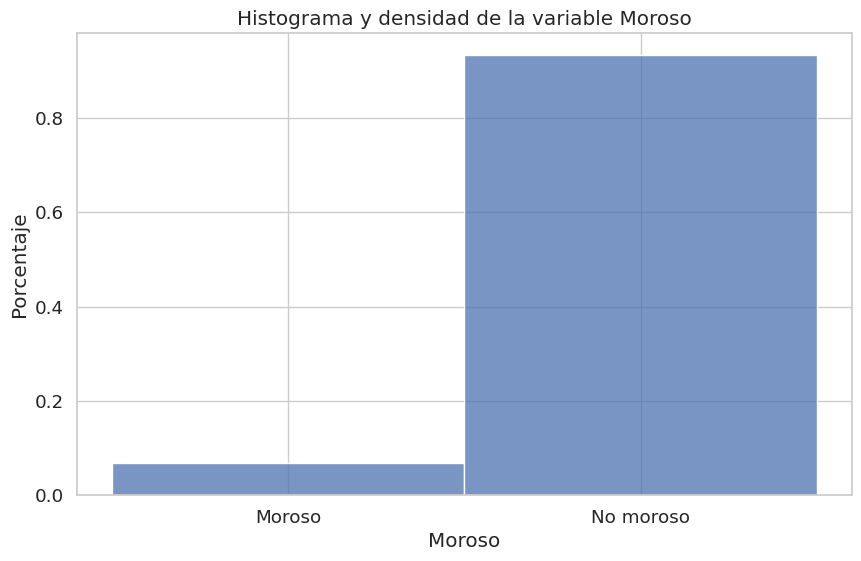

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(df['moroso'],stat = 'density')
plt.ylabel('Porcentaje')
plt.xlabel('Moroso')
plt.title('Histograma y densidad de la variable Moroso')
plt.show()


## Las variables  `porcentaje_crediticio` y `capacidad_de_pago`

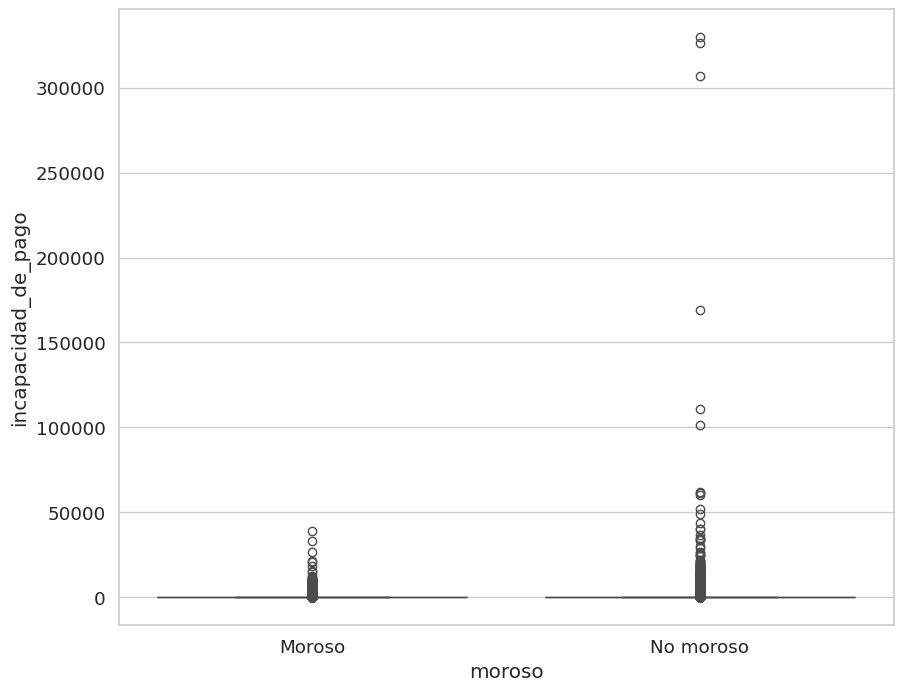

In [40]:
graf_box(df,  'moroso','incapacidad_de_pago')

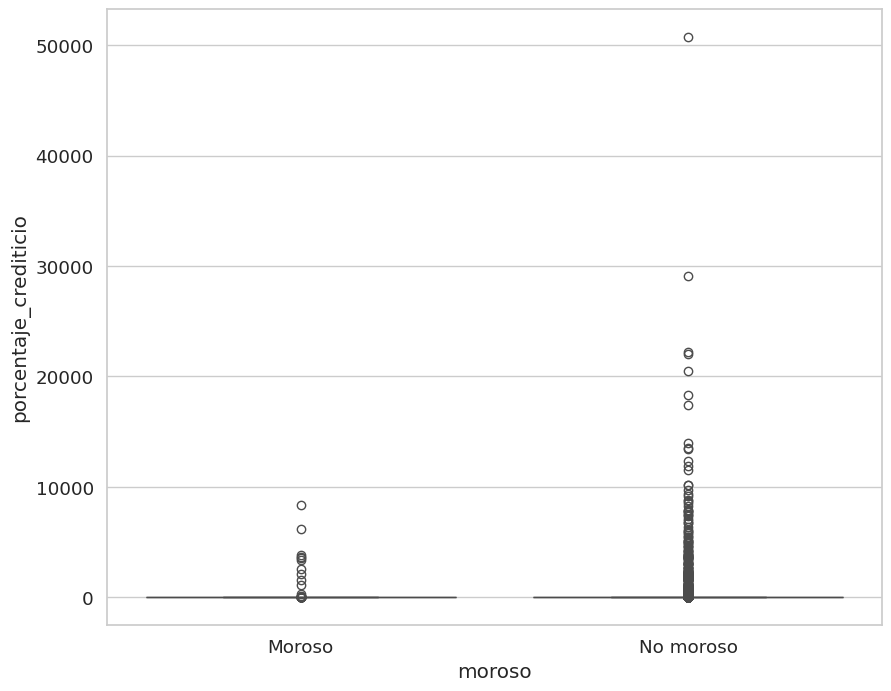

In [41]:
graf_box(df, 'moroso','porcentaje_crediticio')

Estas dos no están siendo informativas por los outliers. Vamos a reescalar el gráfico con las funciones que defimos al principio.

In [42]:
escala_log(df, 'porcentaje_crediticio')
escala_log(df, 'incapacidad_de_pago')

Los outliers no dejan ver la gráfica.

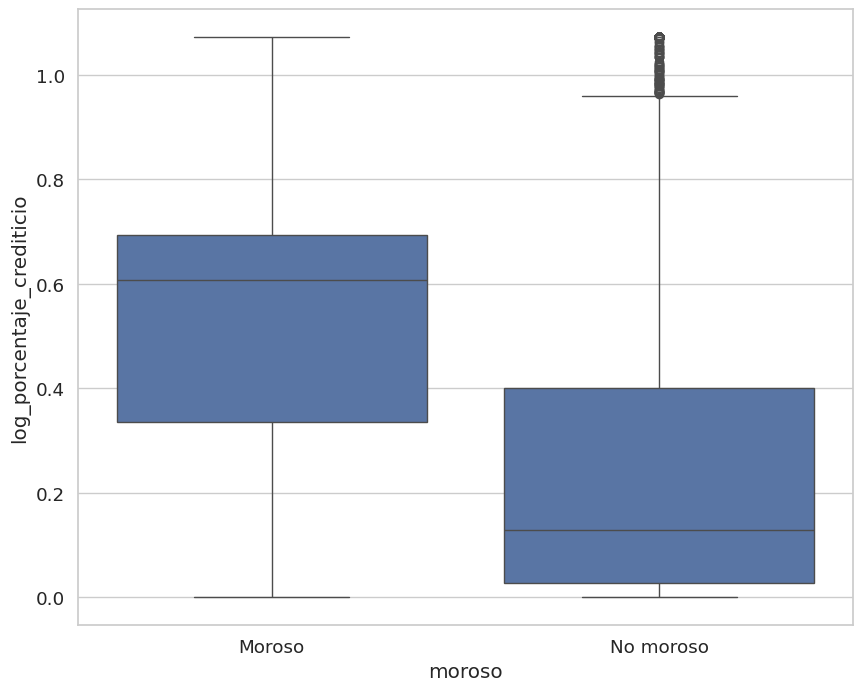

In [43]:
graf_box(df,'moroso','log_porcentaje_crediticio')

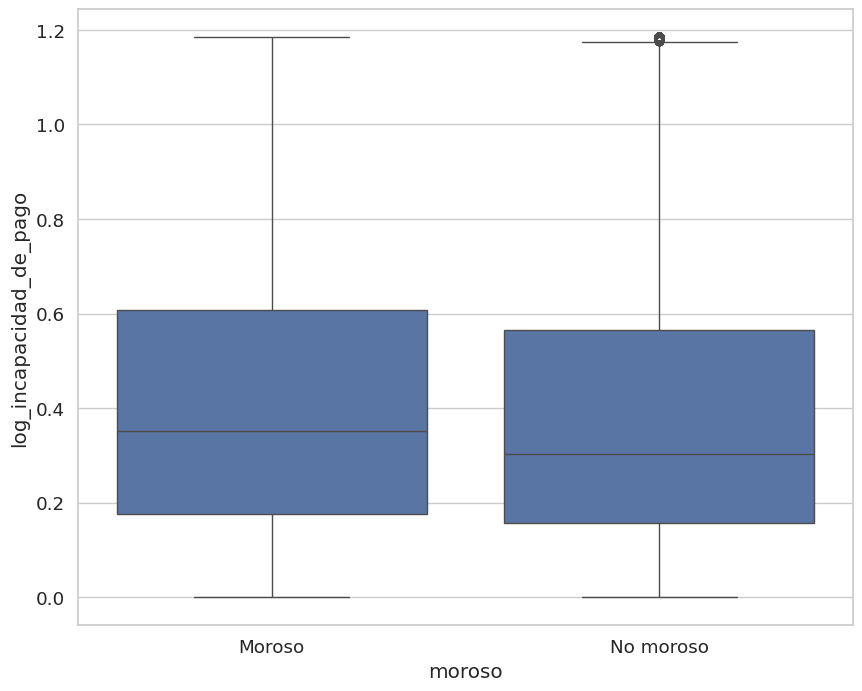

In [44]:
graf_box(df,  'moroso','log_incapacidad_de_pago')

Lo importante es notar tambien que la función logaritmo es monónota creciente, y aunque estos no son los datos que posiblemente vayamos a usar, no indican como se están distribuyendo los datos. Para conocer la distribucion de estas nuevas varaibles.

Notemos que posiblemente nuestro tratamiento de outliers aun no es fino. Pero no vamos a cambiar de método hasta determinar el algoritmo, existen otras maneras de reescalar, pero estamos apuntando a una clasificación. Además las gráficas ahora son informaticas.


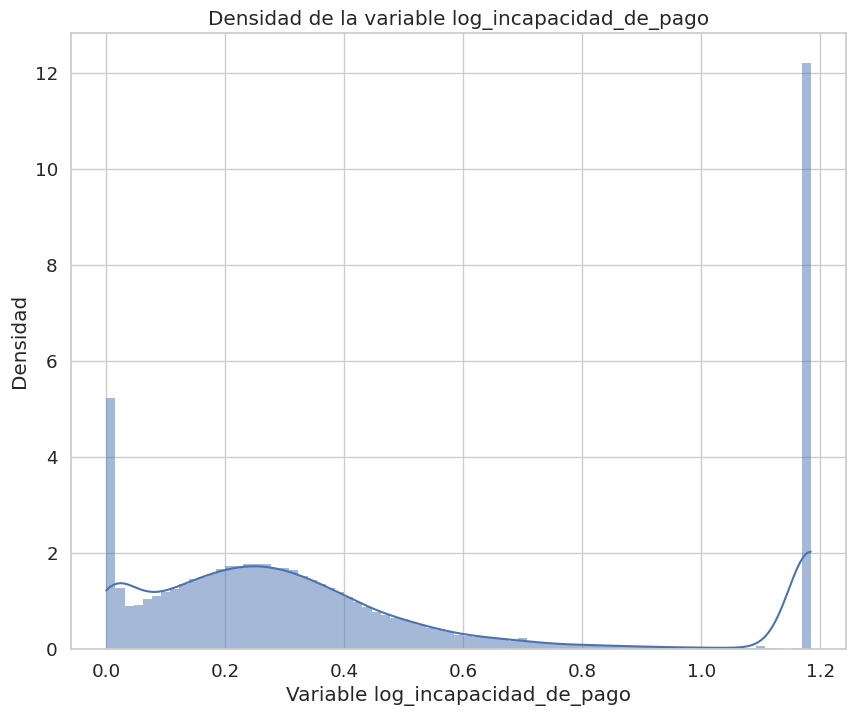

In [45]:
graf_dens(df, 'log_incapacidad_de_pago')

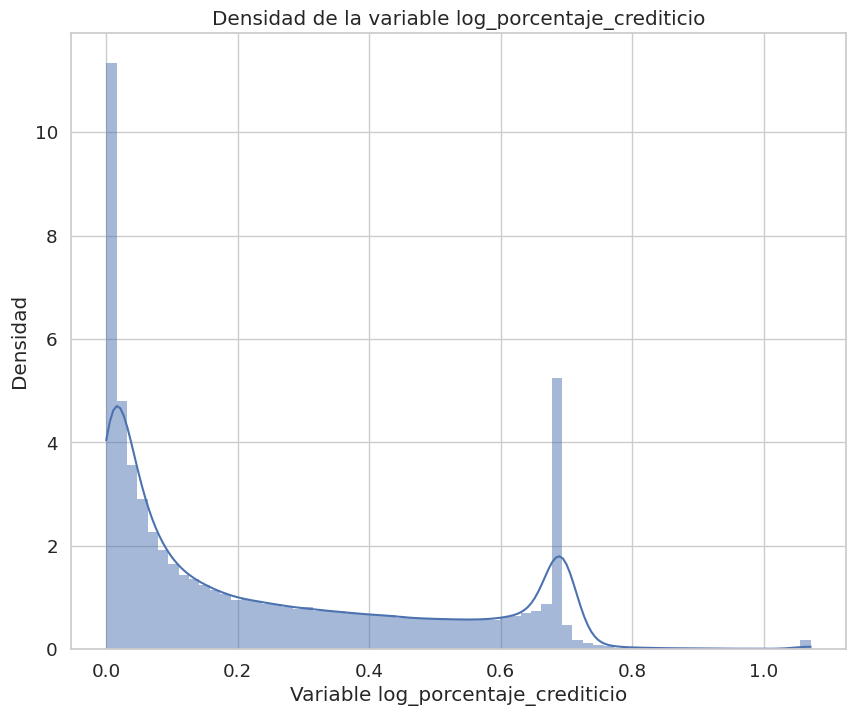

In [46]:
graf_dens(df,'log_porcentaje_crediticio')

Tambien observamos que debemos considerar nuevas maneras de imputar datos, o tenerlo muy presente en el entrenamiento, pero estamos seguros que hacerlo con la media sesgará mucho el modelo.

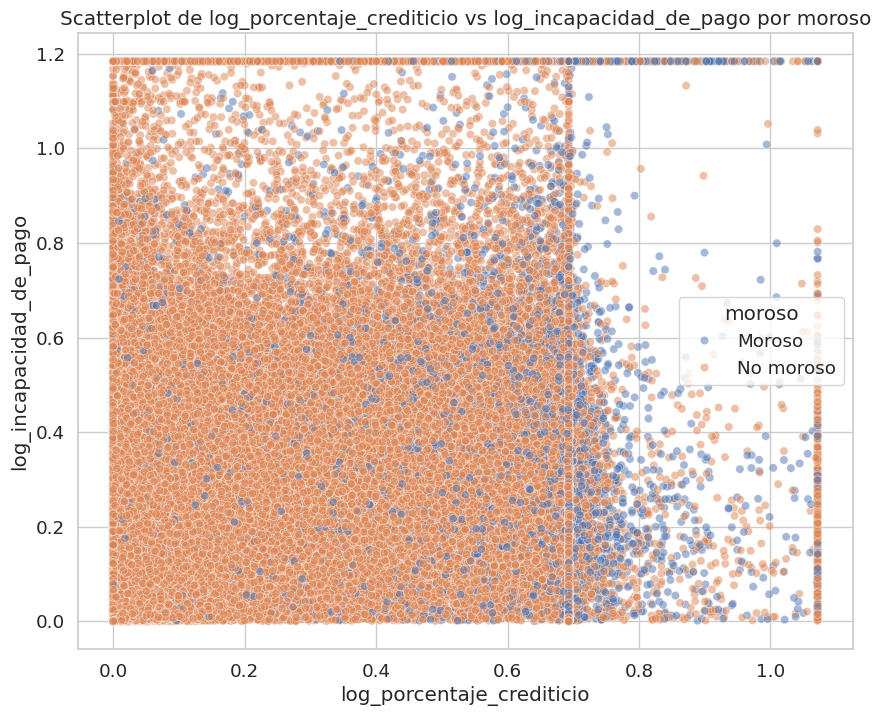

In [47]:
graf_scatter(df,'log_porcentaje_crediticio','log_incapacidad_de_pago','moroso')

Este gráfico no es informativo directamente, pues al estar en una escala logaritmica no debe tomarse igual que los datos originales. Por ejemplo, si en este diagrama existira una relacion lineal tendríamos


$$\log(Y)=\beta_1\log(X)+\beta_0$$
lo que es equivalente a;
$$e^{\log(Y)}=e^{\beta_1\log(X)+\beta_0}$$
que nos resulta de;
$$Y=X^{\beta_1}e^{\beta_0}$$

que claramente no es una relación lineal. Sin embargo podemos notar que los outliers se están acumulando en los limites del gráfico como se observa en el boxplot. Lo cual es algo que deseabamos pues al momento tenemos la información a una esacala mas manejable. Por ejemplo observe que casi todas las personas que no son morosas no exeden sus limites de crédito. Lo cual no indicaria que empezar a acercarse al consumo de todo su limite de crédito la persona deberia considerarse de un riesgo mayor.

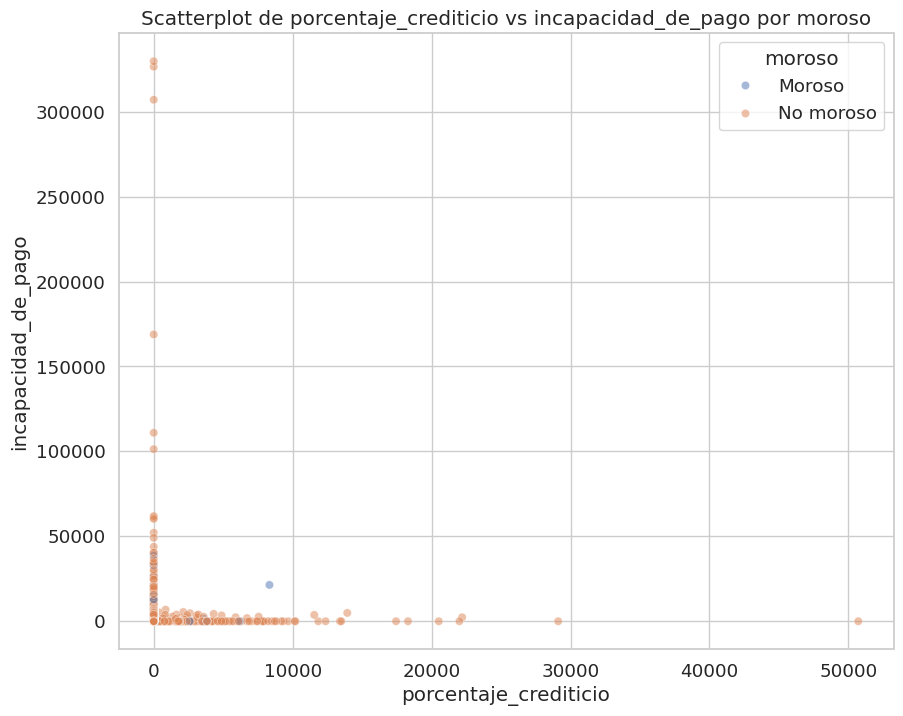

In [48]:
graf_scatter(df,'porcentaje_crediticio','incapacidad_de_pago','moroso')

Vamos ahora explorar el resto de variables que restan del data frame, pues proponemos que este data frame puede tratarse de manera que el balanceo de clases no impacte en el desarrollo del modelo, entonces restaria ver que las demas varaibles tengan datos coherentes con lo que vamos trabajar. Además tenemos como apoyo el archivo de test, dado en la página para comparar el calculo de probabilidades.


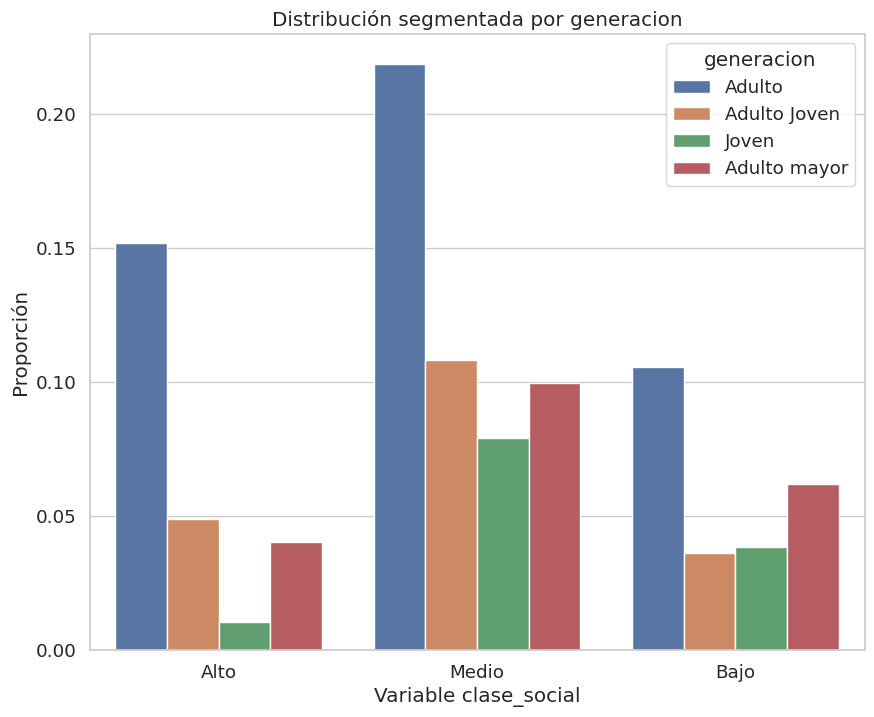

In [49]:
graf_bar(df,'clase_social','generacion')

In [50]:
porcentaje = df.groupby('clase_social')['generacion'].value_counts().transform(lambda x: x / len(df) * 100).sum()
porcentaje


100.0

In [51]:
porcentaje.sum()

100.0

En este caso observamos que los adultos en cada clase social ocupan la mayor parte de la catergoria. Mientras que los jovenes y adultos mayorees ocupan menos.

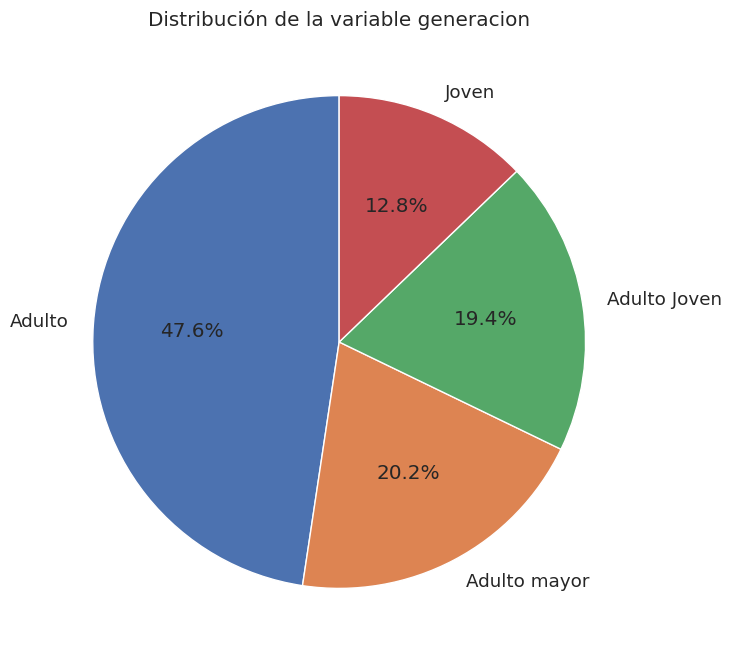

<Figure size 640x480 with 0 Axes>

In [52]:
graf_pie(df,'generacion')

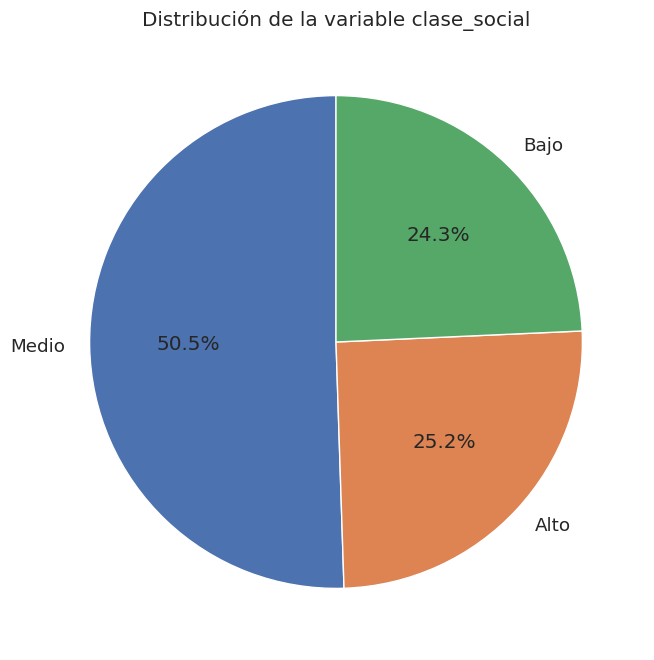

<Figure size 640x480 with 0 Axes>

In [53]:
graf_pie(df,'clase_social')

In [54]:
def categoria(variable):
    # Respecto a la edad de la persona se le asigna un ingreso aproximado de ese año.
    if variable == "Moroso" :
        return 1
    else:
        return 0

df['moroso_HTP'] = df['moroso'].apply(categoria)

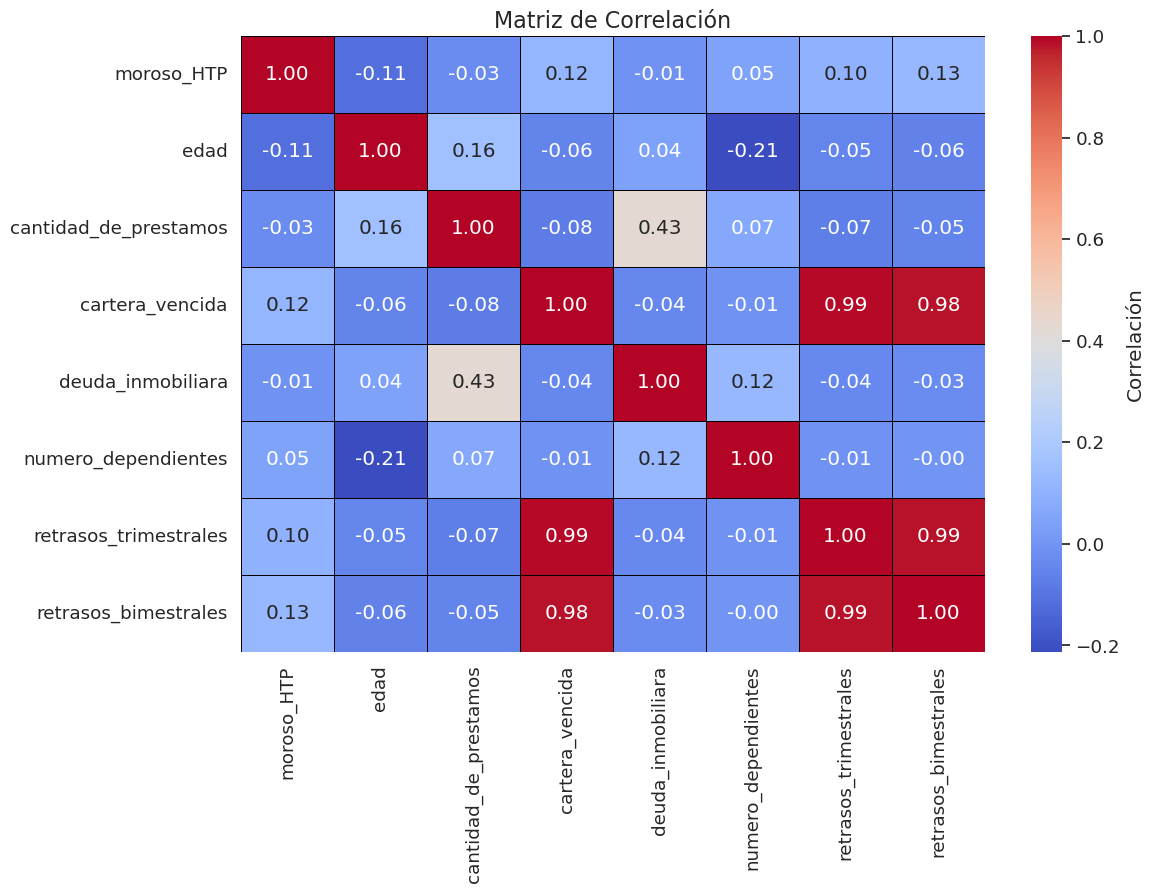

In [55]:
lista_de_categorias=['moroso_HTP','edad', 'cantidad_de_prestamos', 'cartera_vencida', 'deuda_inmobiliara', 'numero_dependientes','retrasos_trimestrales','retrasos_bimestrales']
correlation_matrix = df[lista_de_categorias].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, linecolor='black', cbar_kws={'label': 'Correlación'})
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

Las últimas variables desaprueban una relación lieneal con la target. Pero alta entre ellas. Estamos en condiciones de afrontar la prueba de la

In [56]:
t_test, pvalue = ttest_ind(df['retrasos_bimestrales'], df['retrasos_trimestrales'])
t_test, pvalue < .005

(12.413142163579534, True)

In [57]:
t_test, pvalue = ttest_ind(df['retrasos_bimestrales'], df['cartera_vencida'])
t_test, pvalue < .005


(10.650855759375206, True)

Por tanto, dada la relacion existente del mapa de calor, los datos son estadísticamente distintos. De esta manera las vamos a mantener. Finalmente veremos que tanto nuestras variables son cercanas a

2024-11-18 01:36:34.899 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=306.617438)
2024-11-18 01:36:36.451 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=277.054889)
2024-11-18 01:36:37.643 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=359.596812)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,277.054889,134.644424,164.320071,0.371964,0.139170,0.0
norm,306.617438,91.276170,111.059934,0.771679,0.177986,0.0
lognorm,359.596812,979.292363,1008.968010,0.747142,0.514887,0.0


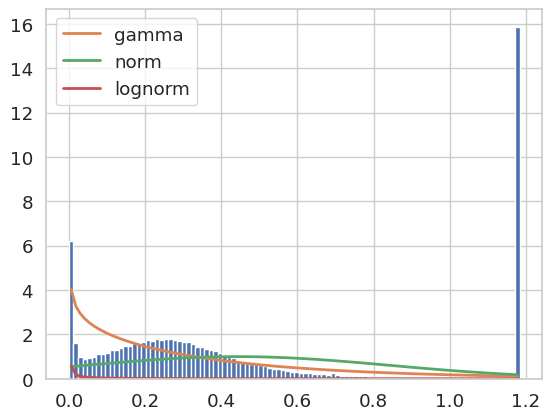

In [58]:
f = Fitter(df['log_incapacidad_de_pago'], distributions=["norm","lognorm","gamma"])
f.fit()
f.summary()

2024-11-18 01:36:38.862 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=295.011772)
2024-11-18 01:36:40.282 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=117.453298)
2024-11-18 01:36:41.691 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=367.717007)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,117.453298,483.690812,513.366459,0.291261,0.316059,0.0
uniform,295.011772,17.866247,37.650012,1.242301,0.372221,0.0
lognorm,367.717007,1062.659763,1092.335410,0.272372,0.523154,0.0


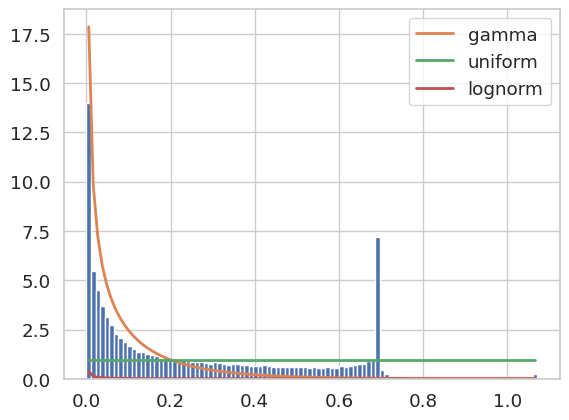

In [59]:
f = Fitter(df['log_porcentaje_crediticio'], distributions=["uniform","lognorm","gamma"])
f.fit()
f.summary()

Con esto se concluye que la forma de manejar los NA, debe mejorarse para ajustar a una distribución para bajarse el error. Pero apuntamos a un modelo, tendremos esto en cuenta para mejorar el tratamiento del modelo.

In [60]:
df.to_csv('data_para_codificacion.csv',index=False)

# Anexo

## Funciones para presentación

In [61]:
def graf_bar(df, variable_1, variable_2):
    plt.figure(figsize=(12, 10))
    sns.set(style="whitegrid", font_scale=1.2)
    palette = sns.color_palette("muted")
    ax = sns.countplot(data=df, x=variable_1, hue=variable_2, stat='probability', palette=palette)

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 18), textcoords='offset points',
                        rotation=15)

    plt.xlabel(f'Variable {variable_1}', fontsize=14, labelpad=10)
    plt.ylabel('Proporción', fontsize=14, labelpad=10)
    plt.title(f'Distribución segmentada por {variable_2}', fontsize=16, weight='bold', pad=15)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'graf_bar_{variable_1}_{variable_2}.png', format='png', dpi=300, bbox_inches='tight')

def graf_pie(df,variable):
    plt.figure(figsize=(8,8))
    plt.gcf().set_facecolor('white')
    colors = sns.color_palette("pastel")
    wedges, texts, autotexts = plt.pie(df[f'{variable}'].value_counts(), labels=df[f'{variable}'].value_counts().index,
                                       autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(edgecolor='k'))

    plt.setp(autotexts, size=12, weight='bold', color='black')
    plt.setp(texts, size=12)

    plt.title(f'Distribución de la variable {variable}', fontsize=16, weight='bold', pad=20)
    plt.tight_layout()
    plt.savefig(f'graf_pie_{variable}.png', format='png', dpi=300, bbox_inches='tight')

def graf_box(df, variable_1, variable_2):
    plt.figure(figsize=(10,8))
    sns.set(style="whitegrid", font_scale=1.2)
    palette = sns.color_palette("coolwarm")

    sns.boxplot(x=variable_1, y=variable_2, data=df, palette=palette, linewidth=2.5)
    plt.title(f'Boxplot de {variable_1} y {variable_2}', fontsize=16, weight='bold', pad=20)
    plt.tight_layout()
    plt.savefig(f'graf_box_{variable_1}_{variable_2}.png', format='png', dpi=300, bbox_inches='tight')

def graf_scatter(df, variable_1, variable_2,variable_3):
    plt.figure(figsize=(10,8))
    sns.set(style="whitegrid", font_scale=1.2)
    palette = sns.color_palette("deep")

    sns.scatterplot(x=variable_1, y=variable_2, hue=variable_3, data=df, palette=palette, alpha=0.7, edgecolor='w', s=100)
    plt.title(f'{variable_1} vs {variable_2} por {variable_3}', fontsize=16, weight='bold', pad=20)
    plt.xlabel(variable_1, fontsize=14)
    plt.ylabel(variable_2, fontsize=14)
    plt.tight_layout()
    plt.savefig(f'graf_box_{variable_1}_{variable_2}_{variable_3}.png', format='png', dpi=300, bbox_inches='tight')

def graf_dens(df, variable):
    plt.figure(figsize=(10,8))
    sns.set(style="whitegrid", font_scale=1.2)
    palette = sns.color_palette("Blues")

    sns.histplot(df[variable], kde=True, stat='density', linewidth=0, color=palette[4])
    plt.ylabel('Densidad', fontsize=14)
    plt.xlabel(f'Variable {variable}', fontsize=14)
    plt.title(f'Densidad de la variable {variable}', fontsize=16, weight='bold', pad=20)
    plt.tight_layout()
    plt.savefig(f'graf_pie_{variable}.png', format='png', dpi=300, bbox_inches='tight')





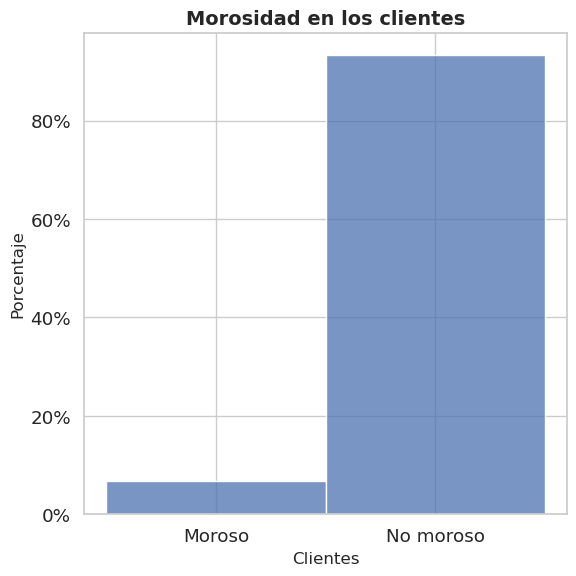

In [62]:
plt.figure(figsize=(6,6))
sns.set(style="whitegrid", font_scale=1.2)
palette = sns.color_palette("coolwarm")

sns.histplot(df['moroso'],stat = 'density')
plt.ylabel('Porcentaje', fontsize=12)
plt.xlabel('Moroso', fontsize=12)
plt.title('Histograma y densidad de la variable Moroso', fontsize=14, weight='bold')

plt.ylabel('Porcentaje', fontsize=12)
plt.xlabel('Clientes', fontsize=12)
plt.title('Morosidad en los clientes', fontsize=14, weight='bold')


plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.tight_layout()
plt.savefig(f'graf_pie_moroso.png', format='png', dpi=300, bbox_inches='tight')

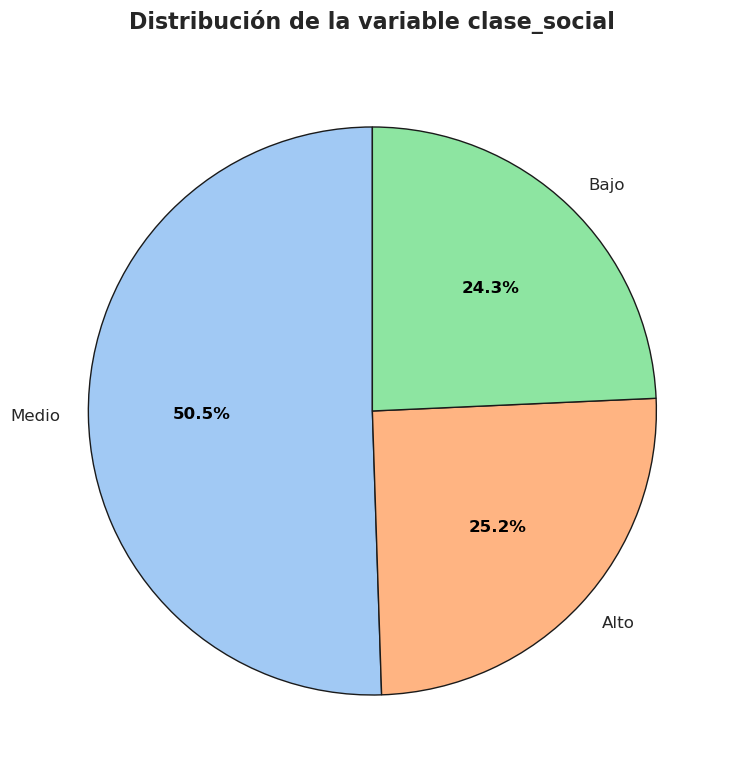

In [63]:
graf_pie(df,'clase_social')

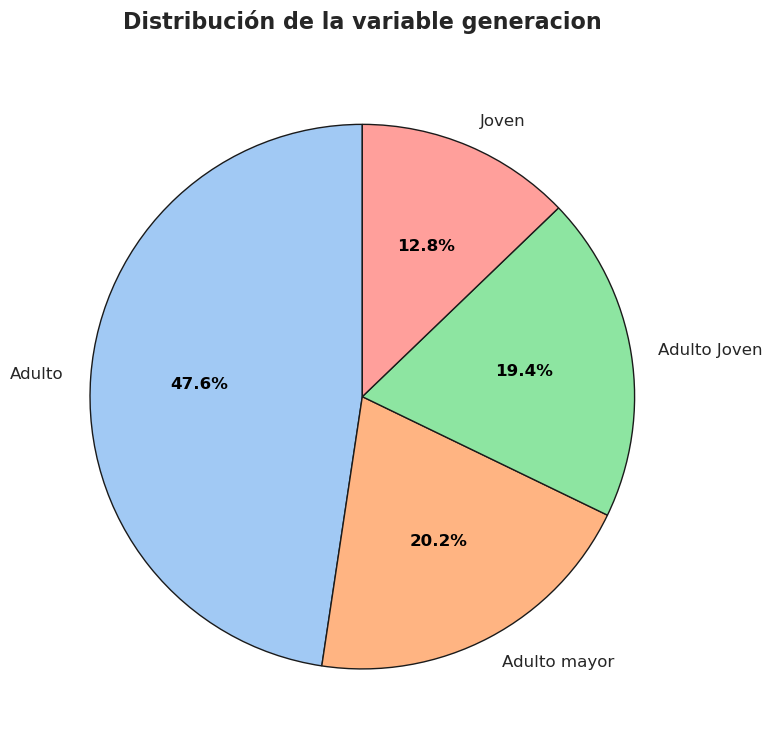

In [64]:
graf_pie(df,'generacion')


/tmp/ipykernel_19549/2324430656.py:5: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.countplot(data=df, x=variable_1, hue=variable_2, stat='probability', palette=palette)


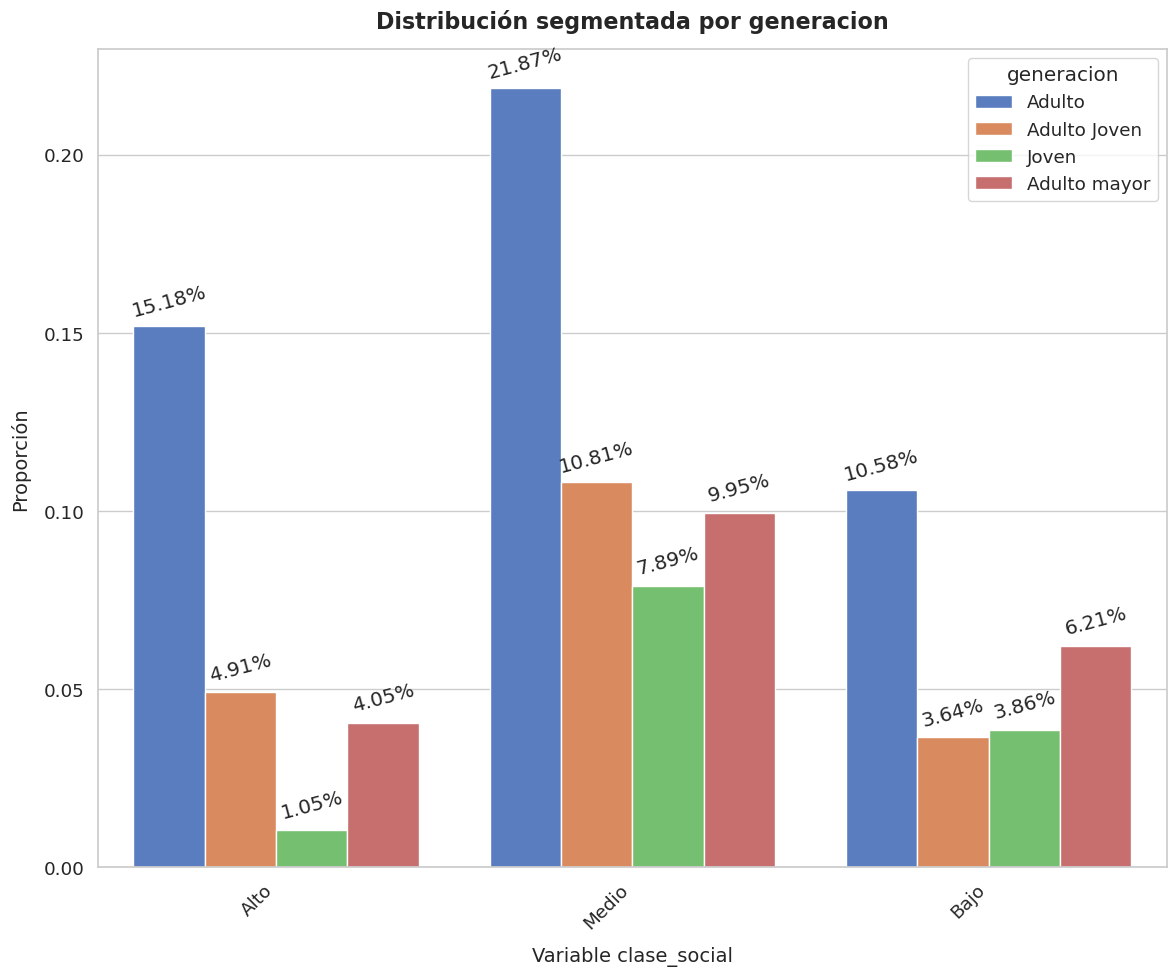

In [65]:
graf_bar(df,'clase_social','generacion')